## 1 - Exploratory data analysis

#### Importing and reading data

In [1]:
import pandas as pd

ratingsDF = pd.read_csv("./data/ratings.csv")

#### Showing the five first rows

In [2]:
ratingsDF.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### Row and columns quantite

In [3]:
ratingsDF.shape

(100836, 4)

#### Taking the unique values in rating label

In [4]:
ratingsDF['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

#### Taking the value quantite each unique

In [5]:
ratingsDF['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

#### Taking the mean of the rating label

In [6]:
ratingsDF['rating'].mean()

3.501556983616962

#### Ploting histogram graphic with the ratings

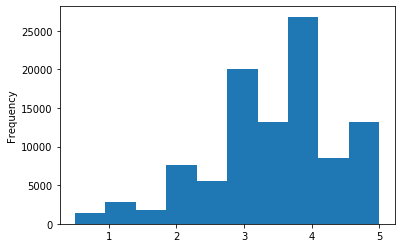

In [7]:
ratingsDF.rating.plot(kind='hist')

#### Taking the median

In [8]:
ratingsDF.rating.median()

3.5

#### Taking a describtion about the Data Frame

In [9]:
ratingsDF.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

#### Ploting Boxplot

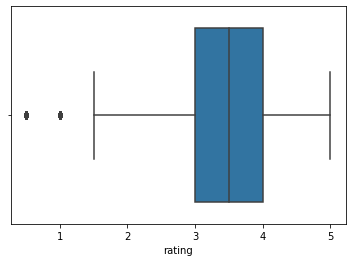

In [10]:
import seaborn as sns

sns.boxplot(ratingsDF.rating)